<a href="https://colab.research.google.com/github/RonBartov/Introduction_to_Optimization/blob/main/facility_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# **Facility Location**

## Description
In this task, we aim to determine the optimal location for a cafeteria that serves several buildings in a university. The goal is to find a location that minimizes the distance from the buildings to the cafeteria based on two criteria:

1. The point that minimizes the maximum distance (minmax).
2. The point that minimizes the mean square distance (mse).

## Formulas

The Mean Square Error (MSE) criterion is calculated as:

$$
\text{MSE}(c) = \frac{1}{N} \sum_{i=1}^{N} \left( \left( x_i - c_x \right)^2 + \left( y_i - c_y \right)^2 \right)
$$

where $(x_i, y_i) $ are the coordinates of the buildings, and $(c_x, c_y)$ is the optimal cafeteria location.

The Minmax criterion is calculated as:

$$
\text{Minmax}(c) = \max_{i=1,\ldots,N} \sqrt{\left( x_i - c_x \right)^2 + \left( y_i - c_y \right)^2}
$$

## Expectations

We expect that the optimal location for the Minmax criterion will be closer to the center of the furthest buildings to ensure the maximum **distance** is minimized.

On the other hand, we expect that the optimal location for the MSE criterion will be close to the centroid of the building locations, as **it minimizes the average squared distance**.

In [3]:
# Function 1: Generate N random vectors in R^2
def generate_random_positions(N, x_range=(0, 100), y_range=(0, 100)):
    """
    Generates N random positions in a 2D plane within given ranges.

    Parameters:
    N (int): Number of random positions.
    x_range (tuple): Range for x coordinates.
    y_range (tuple): Range for y coordinates.

    Returns:
    np.ndarray: An array of shape (N, 2) with random positions.
    """
    x_positions = np.random.uniform(x_range[0], x_range[1], N)
    y_positions = np.random.uniform(y_range[0], y_range[1], N)
    return np.column_stack((x_positions, y_positions))

# Function 2: Find optimal position based on the selected criterion
def find_optimal_position(positions, criterion='mse'):
    """
    Finds the optimal position based on the selected criterion (mse or minmax).

    Parameters:
    positions (np.ndarray): Array of building positions.
    criterion (str): Criterion for optimization ('mse' or 'minmax').

    Returns:
    np.ndarray: Optimal position in the 2D plane.
    """
    def mse_cost(center):
        return np.mean(np.sum((positions - center)**2, axis=1))

    def minmax_cost(center):
        return np.max(np.sqrt(np.sum((positions - center)**2, axis=1)))

    if criterion == 'mse':
        result = minimize(mse_cost, np.mean(positions, axis=0), method='L-BFGS-B')
    elif criterion == 'minmax':
        result = minimize(minmax_cost, np.mean(positions, axis=0), method='L-BFGS-B')
    else:
        raise ValueError("Criterion must be either 'mse' or 'minmax'")

    return result.x

# Function 3: Draw a 2D map with buildings and optimal location
def draw_map(positions, optimal_position_mse, optimal_position_minmax):
    """
    Draws a 2D map showing the locations of the buildings and the optimal positions.

    Parameters:
    positions (np.ndarray): Array of building positions.
    optimal_position_mse (np.ndarray): Optimal position based on MSE criterion.
    optimal_position_minmax (np.ndarray): Optimal position based on minmax criterion.
    """
    plt.scatter(positions[:, 0], positions[:, 1], c='blue', label='Buildings')
    plt.scatter(optimal_position_mse[0], optimal_position_mse[1], c='red', label='Optimal Position (MSE)', marker='X')
    plt.scatter(optimal_position_minmax[0], optimal_position_minmax[1], c='green', label='Optimal Position (Minmax)', marker='X')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.title('Building Locations and Optimal Cafeteria Locations')
    plt.grid(True)
    plt.show()

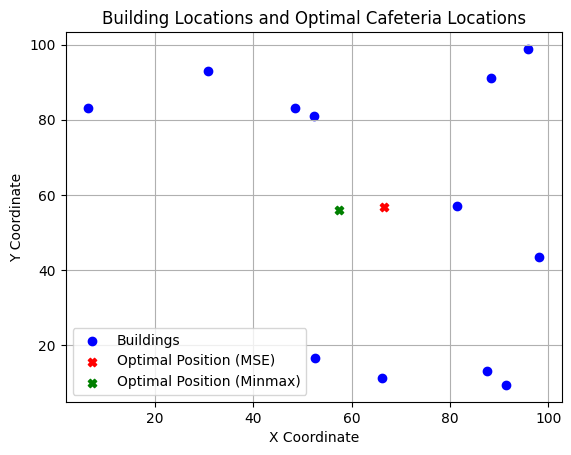

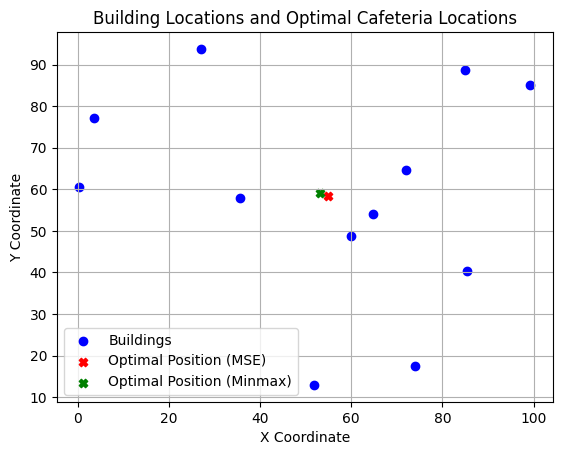

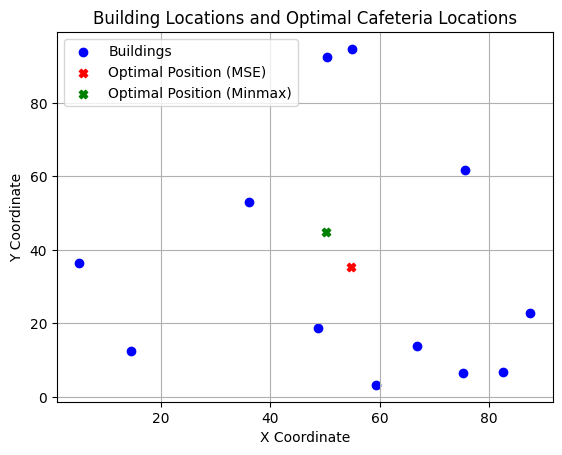

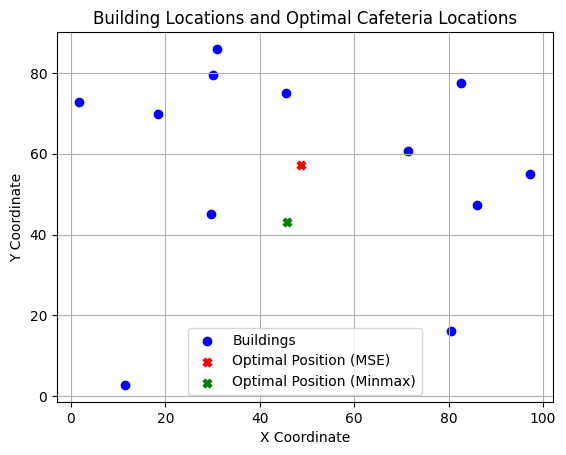

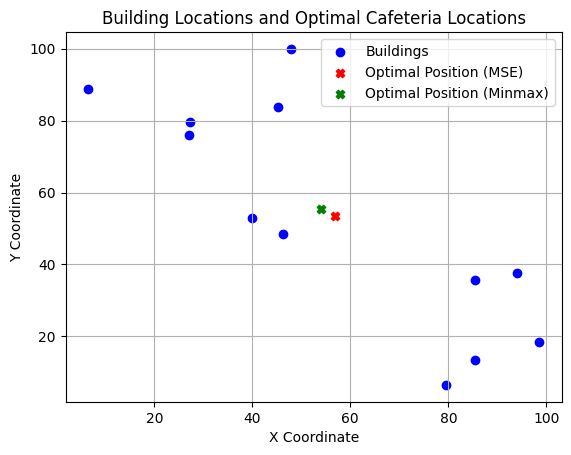

In [7]:
# Simulation
N = 12  # Number of buildings
NS = 5 # Number of simulations to run

for s in range(NS):
    positions = generate_random_positions(N)
    optimal_position_mse = find_optimal_position(positions, 'mse')
    optimal_position_minmax = find_optimal_position(positions, 'minmax')

    # Draw maps for both criteria
    draw_map(positions, optimal_position_mse, optimal_position_minmax)